In [ ]:
from google.colab import files

# Replace 'modified_dataset.csv' with the name of your modified dataset file
files.download('modified_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. Basic characteristics of the dataset:
Data types of variables:
tweet                    object
existence                object
existence_confidence    float64
dtype: object

Size of the dataset:
(6027, 3)

Summary statistics:
       existence_confidence
count           6024.000000
mean               0.794113
std                0.180086
min                0.334600
25%                0.658500
50%                0.707300
75%                1.000000
max                1.000000
Columns in the DataFrame:
Index(['tweet', 'existence', 'existence_confidence'], dtype='object')

2. Overall structure of the dataset:


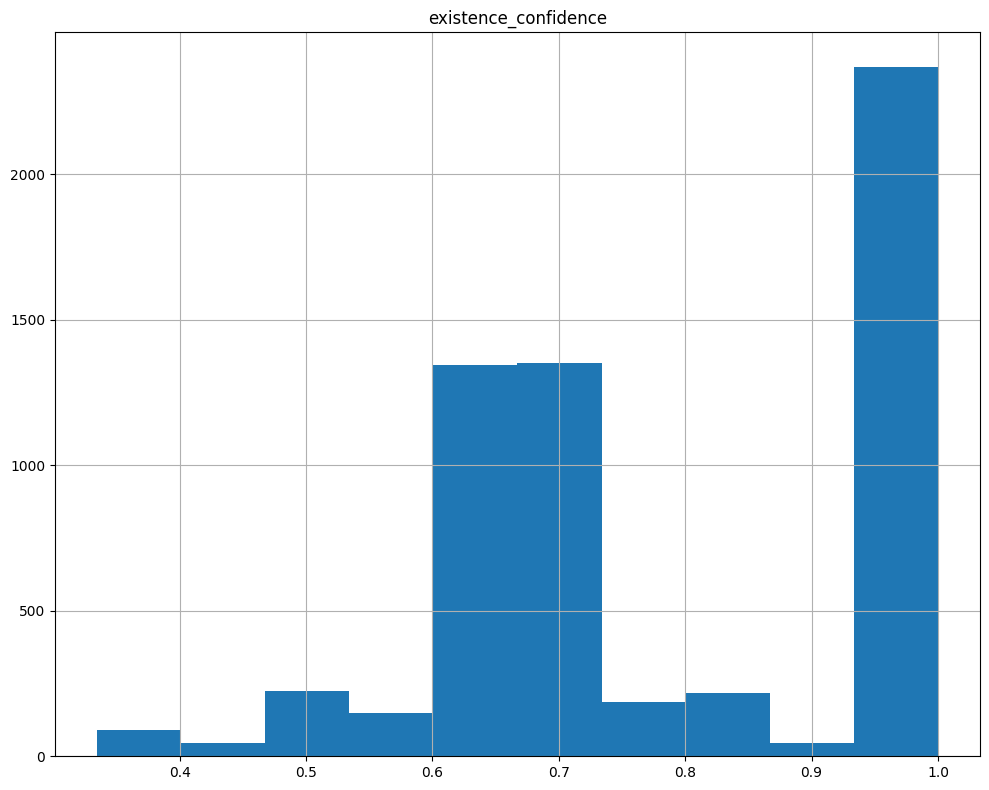


3. Patterns in the data:


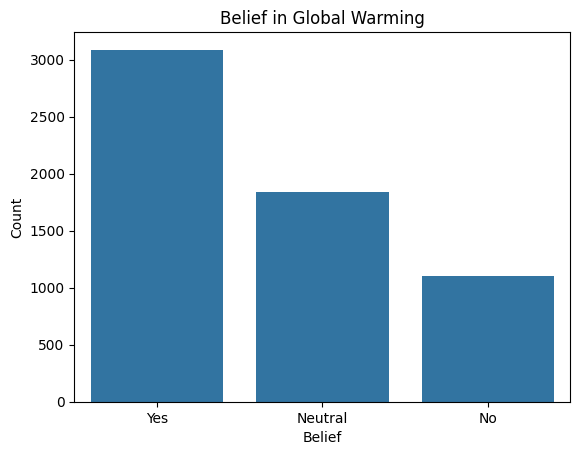


4. Outliers in the data:
Outliers using z-score method:
Empty DataFrame
Columns: [tweet, existence, existence_confidence]
Index: []

Outliers using IQR method:
Empty DataFrame
Columns: [tweet, existence, existence_confidence]
Index: []

5. Missing values:
Number of missing values for each variable:
tweet                   0
existence               0
existence_confidence    3
dtype: int64

6. Correlation between variables:
Correlation Matrix:
                      existence_confidence
existence_confidence                   1.0

6. Variability within each variable:
Variance of each numerical variable:
Variance of existence_confidence variable: 0.03243087287318819


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('modified 23015919-020 dataset.csv')

# 1. Basic characteristics of the dataset
print("1. Basic characteristics of the dataset:")
print("Data types of variables:")
print(df.dtypes)
print("\nSize of the dataset:")
print(df.shape)
print("\nSummary statistics:")
print(df.describe())

# 2. Overall structure of the dataset




def visualize_data_distribution(dataset_file):
    try:
        # Read the modified dataset file
        df = pd.read_csv(dataset_file)

        # Check the columns of the DataFrame
        print("Columns in the DataFrame:")
        print(df.columns)

        # Visualize data distribution for numerical variables
        print("\n2. Overall structure of the dataset:")
        df.hist(column='existence_confidence', figsize=(10, 8))
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("An error occurred:", e)

if __name__ == "__main__":
    dataset_file = "modified 23015919-020 dataset.csv"  # Change this to the path of your modified dataset file
    visualize_data_distribution(dataset_file)




# 3. Patterns in the data
print("\n3. Patterns in the data:")

# Example: Count plot for belief in global warming
sns.countplot(data=df, x='existence')
plt.title('Belief in Global Warming')
plt.xlabel('Belief')
plt.ylabel('Count')
plt.show()



print("\n4. Outliers in the data:")
# Check for outliers in existence_confidence column using z-score
z_scores = np.abs((df['existence_confidence'] - df['existence_confidence'].mean()) / df['existence_confidence'].std())
outliers_z_score = df[z_scores > 3]  # Selecting outliers with z-score greater than 3

# Alternatively, you can use IQR to identify outliers
Q1 = df['existence_confidence'].quantile(0.25)
Q3 = df['existence_confidence'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['existence_confidence'] < (Q1 - 1.5 * IQR)) | (df['existence_confidence'] > (Q3 + 1.5 * IQR))]

# Print outliers found using z-score and IQR methods
print("Outliers using z-score method:")
print(outliers_z_score)
print("\nOutliers using IQR method:")
print(outliers_iqr)


# 5. Missing values
print("\n5. Missing values:")
print("Number of missing values for each variable:")
print(df.isnull().sum())



# .6 Correlation between variables

print("\n6. Correlation between variables:")


# Exclude non-numeric columns before finding correlation matrix
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

# Find correlation matrix
correlation_matrix = numeric_df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)





# 7. Variability within each variable
print("\n6. Variability within each variable:")
print("Variance of each numerical variable:")


# Find variance of 'existence_confidence' variable
variance_existence_confidence = df['existence_confidence'].var()

# Print variance
print("Variance of existence_confidence variable:", variance_existence_confidence)





In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
csv_file = "modified 23015919-020 dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels_encoded, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectors, y_train)

# Predict on test set
y_pred = svm_classifier.predict(X_test_vectors)

# Decode predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



              precision    recall  f1-score   support

     Neutral       0.62      0.53      0.57       356
          No       0.64      0.47      0.54       214
         Yes       0.70      0.83      0.76       636

    accuracy                           0.67      1206
   macro avg       0.66      0.61      0.62      1206
weighted avg       0.67      0.67      0.67      1206



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
csv_file = "modified 23015919-020 dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels_encoded, test_size=0.2, random_state=42)

# Vectorize text data using Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train SVM model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectors, y_train)

# Predict on test set
y_pred = svm_classifier.predict(X_test_vectors)

# Decode predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

     Neutral       0.57      0.57      0.57       356
          No       0.64      0.47      0.54       214
         Yes       0.72      0.79      0.76       636

    accuracy                           0.67      1206
   macro avg       0.64      0.61      0.62      1206
weighted avg       0.66      0.67      0.66      1206



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Import Naive Bayes classifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
csv_file = "modified 23015919-020 dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels_encoded, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train Naive Bayes model
naive_bayes_classifier = MultinomialNB()  # Use Multinomial Naive Bayes for text classification
naive_bayes_classifier.fit(X_train_vectors, y_train)

# Predict on test set
y_pred = naive_bayes_classifier.predict(X_test_vectors)

# Decode predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

     Neutral       0.65      0.45      0.53       356
          No       0.65      0.37      0.47       214
         Yes       0.66      0.87      0.75       636

    accuracy                           0.66      1206
   macro avg       0.65      0.56      0.59      1206
weighted avg       0.66      0.66      0.64      1206



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer for BoW
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Import Naive Bayes classifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
csv_file = "modified 23015919-020 dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels_encoded, test_size=0.2, random_state=42)

# Vectorize text data using Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train Naive Bayes model
naive_bayes_classifier = MultinomialNB()  # Use Multinomial Naive Bayes for text classification
naive_bayes_classifier.fit(X_train_vectors, y_train)

# Predict on test set
y_pred = naive_bayes_classifier.predict(X_test_vectors)

# Decode predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

     Neutral       0.61      0.57      0.59       356
          No       0.53      0.64      0.58       214
         Yes       0.74      0.71      0.72       636

    accuracy                           0.66      1206
   macro avg       0.63      0.64      0.63      1206
weighted avg       0.66      0.66      0.66      1206



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression classifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
csv_file = "modified 23015919-020 dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels_encoded, test_size=0.2, random_state=42)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train Logistic Regression model
logistic_regression_classifier = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression classifier
logistic_regression_classifier.fit(X_train_vectors, y_train)

# Predict on test set
y_pred = logistic_regression_classifier.predict(X_test_vectors)

# Decode predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

     Neutral       0.66      0.53      0.59       356
          No       0.66      0.47      0.55       214
         Yes       0.70      0.85      0.77       636

    accuracy                           0.69      1206
   macro avg       0.67      0.62      0.64      1206
weighted avg       0.68      0.69      0.68      1206



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer for BoW
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression classifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
csv_file = "modified 23015919-020 dataset.csv"
data = pd.read_csv(csv_file)

# Handling missing values
data = data.fillna('')

# Select relevant columns
tweets = data["tweet"]
labels = data["existence"]

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels_encoded, test_size=0.2, random_state=42)

# Vectorize text data using Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train Logistic Regression model
logistic_regression_classifier = LogisticRegression(max_iter=1000)  # Initialize Logistic Regression classifier
logistic_regression_classifier.fit(X_train_vectors, y_train)

# Predict on test set
y_pred = logistic_regression_classifier.predict(X_test_vectors)

# Decode predicted labels
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

     Neutral       0.60      0.56      0.58       356
          No       0.64      0.50      0.56       214
         Yes       0.72      0.80      0.76       636

    accuracy                           0.67      1206
   macro avg       0.65      0.62      0.63      1206
weighted avg       0.67      0.67      0.67      1206



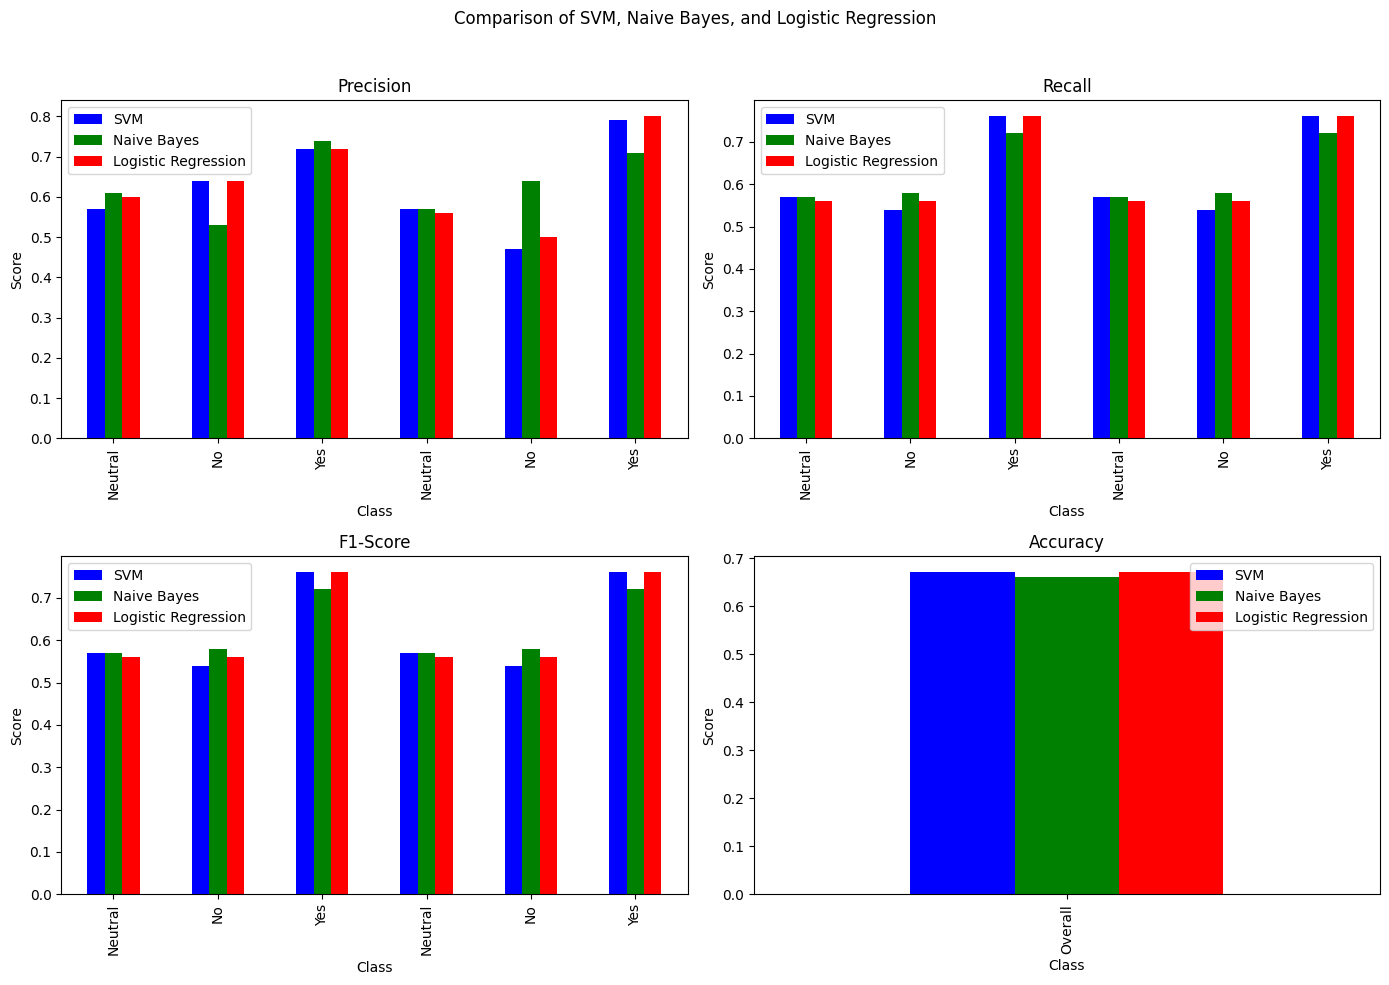

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data
data = {
    'Metric': ['Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'Recall', 'F1-Score', 'F1-Score', 'F1-Score', 'F1-Score', 'F1-Score', 'F1-Score', 'Accuracy'],
    'Class': ['Neutral', 'No', 'Yes', 'Neutral', 'No', 'Yes', 'Neutral', 'No', 'Yes', 'Neutral', 'No', 'Yes', 'Neutral', 'No', 'Yes', 'Neutral', 'No', 'Yes', 'Overall'],
    'SVM': [0.57, 0.64, 0.72, 0.57, 0.47, 0.79, 0.57, 0.54, 0.76, 0.57, 0.54, 0.76, 0.57, 0.54, 0.76, 0.57, 0.54, 0.76, 0.67],
    'Naive Bayes': [0.61, 0.53, 0.74, 0.57, 0.64, 0.71, 0.57, 0.58, 0.72, 0.57, 0.58, 0.72, 0.57, 0.58, 0.72, 0.57, 0.58, 0.72, 0.66],
    'Logistic Regression': [0.60, 0.64, 0.72, 0.56, 0.50, 0.80, 0.56, 0.56, 0.76, 0.56, 0.56, 0.76, 0.56, 0.56, 0.76, 0.56, 0.56, 0.76, 0.67]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting the bar chart
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of SVM, Naive Bayes, and Logistic Regression')

metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
colors = ['b', 'g', 'r']
models = ['SVM', 'Naive Bayes', 'Logistic Regression']

for i, metric in enumerate(metrics):
    ax_i = ax[i//2, i%2]
    subset = df[df['Metric'] == metric]
    if metric != 'Accuracy':
        subset.plot(x='Class', y=models, kind='bar', ax=ax_i, color=colors)
    else:
        subset[['Class', 'SVM', 'Naive Bayes', 'Logistic Regression']].plot(x='Class', kind='bar', ax=ax_i, color=colors)

    ax_i.set_title(metric)
    ax_i.set_xlabel('Class')
    ax_i.set_ylabel('Score')
    ax_i.legend(models, loc='best')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


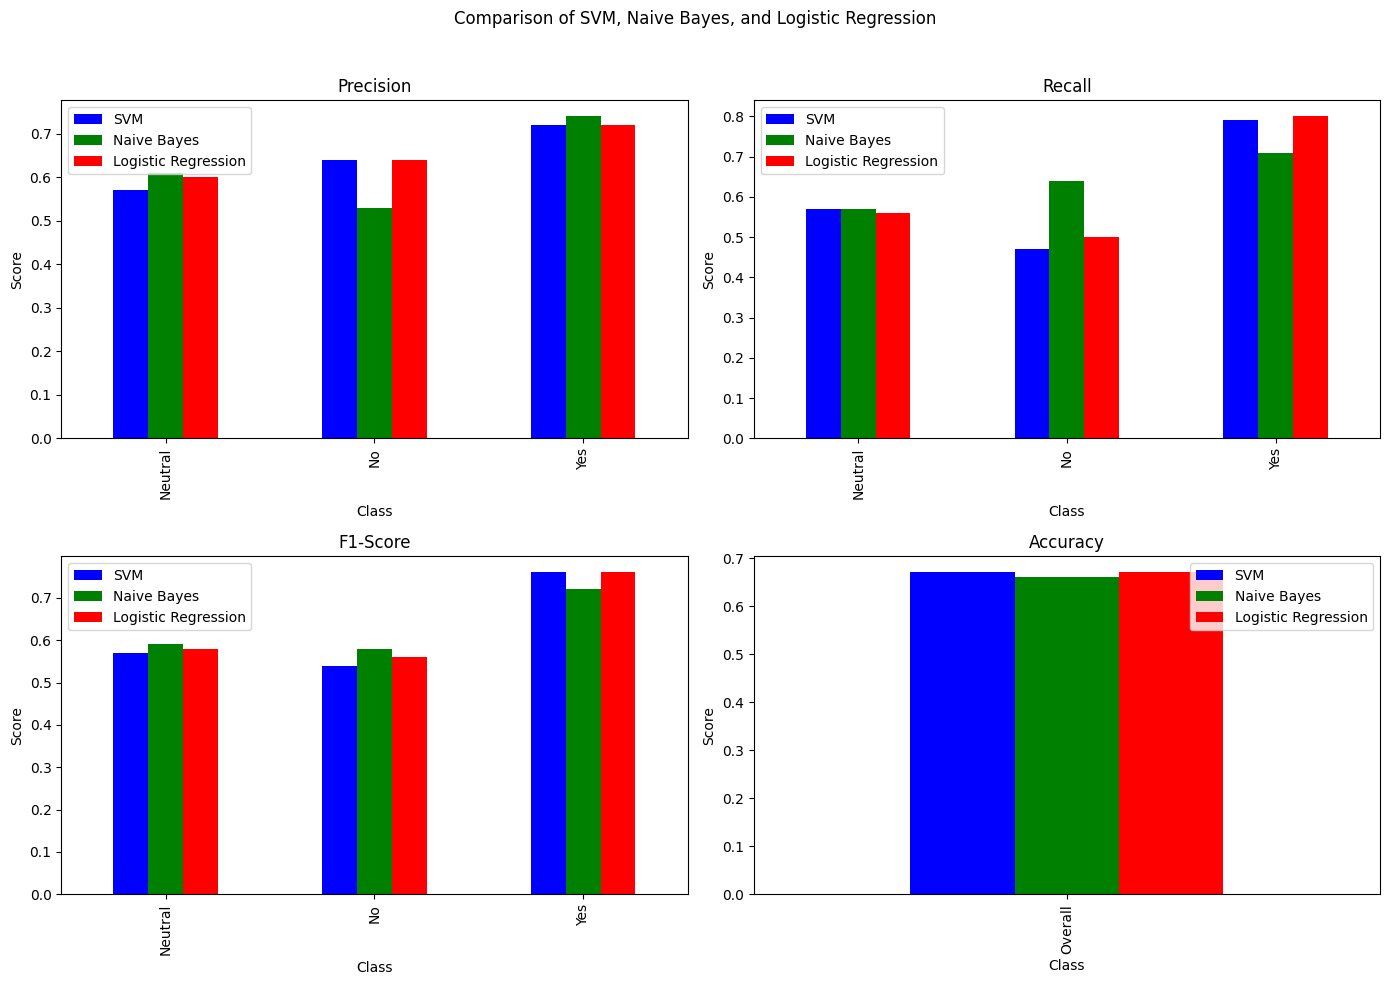

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data
data = {
    'Metric': ['Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'F1-Score', 'F1-Score', 'F1-Score', 'Accuracy'],
    'Class': ['Neutral', 'No', 'Yes', 'Neutral', 'No', 'Yes', 'Neutral', 'No', 'Yes', 'Overall'],
    'SVM': [0.57, 0.64, 0.72, 0.57, 0.47, 0.79, 0.57, 0.54, 0.76, 0.67],
    'Naive Bayes': [0.61, 0.53, 0.74, 0.57, 0.64, 0.71, 0.59, 0.58, 0.72, 0.66],
    'Logistic Regression': [0.60, 0.64, 0.72, 0.56, 0.50, 0.80, 0.58, 0.56, 0.76, 0.67]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting the bar chart
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of SVM, Naive Bayes, and Logistic Regression')

metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
colors = ['b', 'g', 'r']
models = ['SVM', 'Naive Bayes', 'Logistic Regression']

for i, metric in enumerate(metrics):
    ax_i = ax[i//2, i%2]
    subset = df[df['Metric'] == metric]
    if metric != 'Accuracy':
        subset.plot(x='Class', y=models, kind='bar', ax=ax_i, color=colors)
    else:
        subset[['Class', 'SVM', 'Naive Bayes', 'Logistic Regression']].plot(x='Class', kind='bar', ax=ax_i, color=colors)

    ax_i.set_title(metric)
    ax_i.set_xlabel('Class')
    ax_i.set_ylabel('Score')
    ax_i.legend(models, loc='best')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



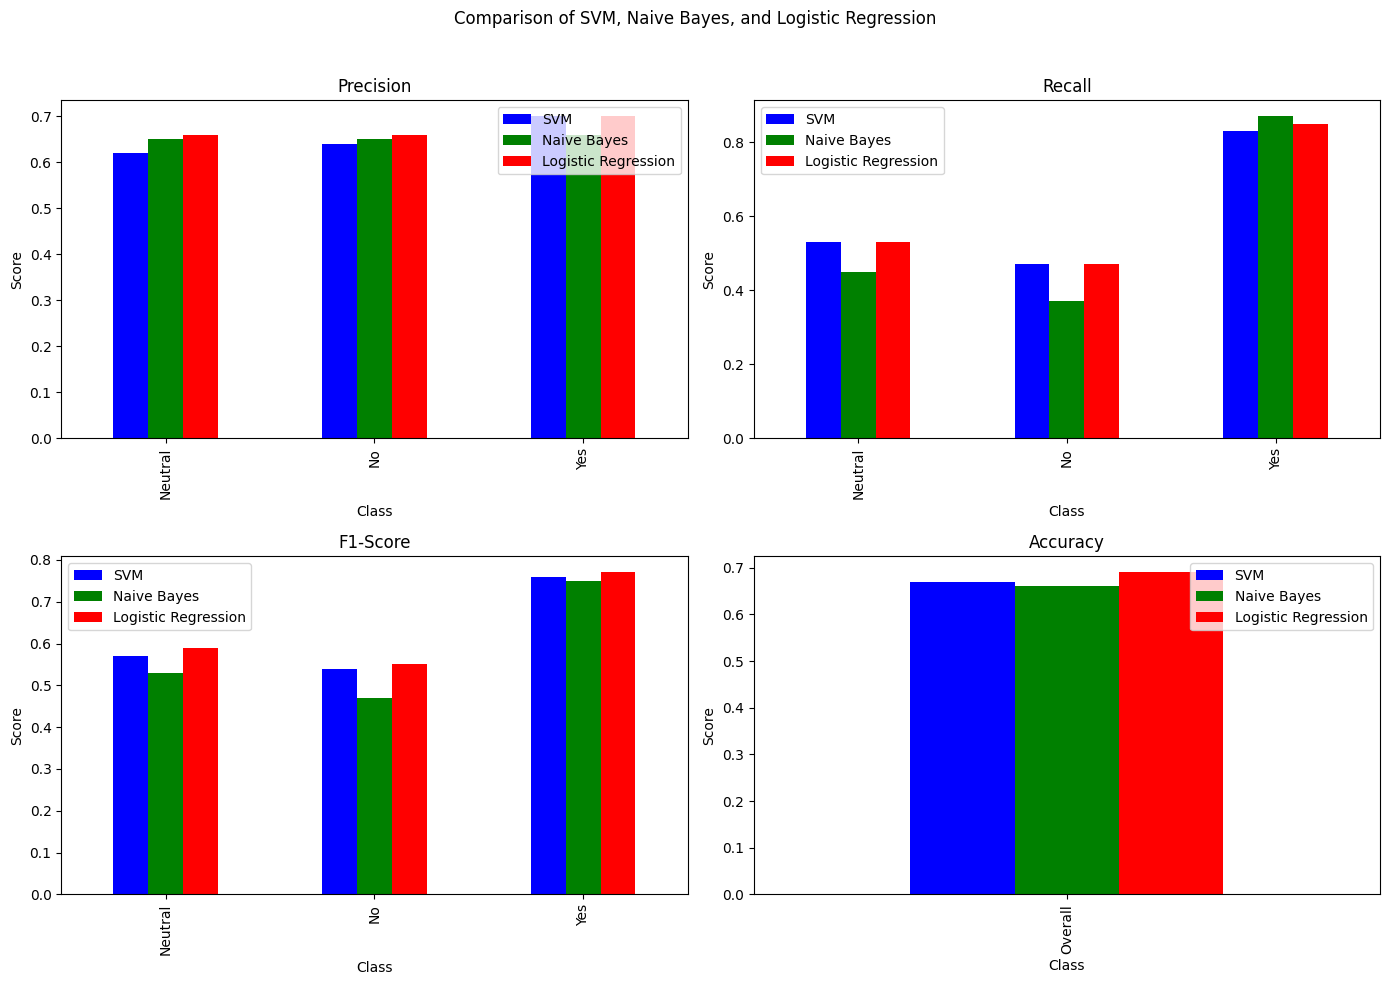

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the data
data = {
    'Metric': ['Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'F1-Score', 'F1-Score', 'F1-Score', 'Accuracy'],
    'Class': ['Neutral', 'No', 'Yes', 'Neutral', 'No', 'Yes', 'Neutral', 'No', 'Yes', 'Overall'],
    'SVM': [0.62, 0.64, 0.70, 0.53, 0.47, 0.83, 0.57, 0.54, 0.76, 0.67],
    'Naive Bayes': [0.65, 0.65, 0.66, 0.45, 0.37, 0.87, 0.53, 0.47, 0.75, 0.66],
    'Logistic Regression': [0.66, 0.66, 0.70, 0.53, 0.47, 0.85, 0.59, 0.55, 0.77, 0.69]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting the bar chart
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of SVM, Naive Bayes, and Logistic Regression')

metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
colors = ['b', 'g', 'r']
models = ['SVM', 'Naive Bayes', 'Logistic Regression']

for i, metric in enumerate(metrics):
    ax_i = ax[i//2, i%2]
    subset = df[df['Metric'] == metric]
    if metric != 'Accuracy':
        subset.plot(x='Class', y=models, kind='bar', ax=ax_i, color=colors)
    else:
        subset[['Class', 'SVM', 'Naive Bayes', 'Logistic Regression']].plot(x='Class', kind='bar', ax=ax_i, color=colors)

    ax_i.set_title(metric)
    ax_i.set_xlabel('Class')
    ax_i.set_ylabel('Score')
    ax_i.legend(models, loc='best')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
